In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import required library

In [2]:
#import dataset from storage location
dat= pd.read_csv(r'H:\00ml\dat2\cleaned data\mergedata\n_merge\final_file_data.csv')

In [4]:
dat.head()

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,weatherCode_Dest,precipMM_Dest,visibility_Dest,pressure_Dest,cloudcover_Dest,DewPointF_Dest,WindGustKmph_Dest,tempF_Dest,WindChillF_Dest,humidity_Dest
0,2016-01-01,1,2016,1,1,606.0,0.0,600,6.0,10397,...,302.0,1.4,5.0,1019.0,89.0,71.0,6.0,73.0,72.0,96.0
1,2016-01-01,1,2016,1,1,642.0,0.0,645,0.0,10397,...,143.0,0.1,5.0,1020.0,100.0,74.0,14.0,77.0,76.0,93.0
2,2016-01-01,1,2016,1,1,644.0,0.0,645,0.0,10397,...,122.0,0.0,10.0,1024.0,89.0,17.0,28.0,21.0,8.0,87.0
3,2016-01-01,1,2016,1,1,644.0,0.0,645,0.0,10397,...,122.0,0.0,10.0,1024.0,89.0,17.0,28.0,21.0,8.0,87.0
4,2016-01-01,1,2016,1,1,652.0,1.0,615,37.0,10397,...,122.0,0.0,10.0,1024.0,89.0,17.0,28.0,21.0,8.0,87.0


In [3]:
#droping null and empty row from dataset
dat=dat.replace('',np.NaN)
dat=dat.dropna()

In [4]:
#arranging columns suitable for test and train split and for further process
dat=dat[['FlightDate','precipMM_Origin','precipMM_Dest',
 'Quarter','Year','Month','DayofMonth','DepTime','DepDel15','CRSDepTime','DepDelayMinutes','OriginAirportID','DestAirportID',
 'ArrTime','CRSArrTime','windspeedKmph_Origin', 'winddirDegree_Origin', 'weatherCode_Origin', 'visibility_Origin', 'pressure_Origin',
 'cloudcover_Origin', 'DewPointF_Origin', 'WindGustKmph_Origin', 'tempF_Origin', 'WindChillF_Origin', 'humidity_Origin',
 'windspeedKmph_Dest', 'winddirDegree_Dest', 'weatherCode_Dest', 'visibility_Dest', 'pressure_Dest', 'cloudcover_Dest',
 'DewPointF_Dest', 'WindGustKmph_Dest', 'tempF_Dest', 'WindChillF_Dest', 'humidity_Dest', 'ArrDel15', 'ArrDelayMinutes' ]]

In [5]:
dat['ArrDelayMinutes'].value_counts()

0.0       1117786
1.0         31621
2.0         29690
3.0         28403
4.0         25775
           ...   
860.0           1
1425.0          1
636.0           1
726.0           1
599.0           1
Name: ArrDelayMinutes, Length: 1069, dtype: int64

In [6]:
#split dependent and indepentent data
Arr_delay=pd.DataFrame(dat.iloc[:,3:-2])
Other_data=pd.DataFrame(dat.iloc[:,-1:])

In [7]:
#split data for training model and testing model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(Arr_delay,Other_data,test_size=0.3,random_state=1)

# LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression
lrc=LinearRegression()
lrc.fit(x_train,y_train)

LinearRegression()

In [9]:
l_pred=lrc.predict(x_test)
l_accuracy = lrc.score(x_test,y_test)
print("Accuracy",l_accuracy*100,"%")


l_score = lrc.score(x_train,y_train)
print("score:",l_score)


Accuracy 93.45328290609862 %
score: 0.9332666919466637


# DecisionTreeRegressor

In [10]:
from sklearn import tree
dtc = tree.DecisionTreeRegressor()
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [27]:
d_pred=dtc.predict(x_test)
d_accuracy = dtc.score(x_test,y_test)
print("Accuracy",d_accuracy*100,"%")


d_score = dtc.score(x_train,y_train)
print("score:",d_score)

Accuracy 92.883872009246 %
score: 1.0


# ExtraTreesRegressor

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor(n_estimators=10)
etc.fit(x_train,y_train)

<ipython-input-12-d43da4ef2220>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(x_train,y_train)


ExtraTreesRegressor(n_estimators=10)

In [26]:
e_pred=etc.predict(x_test)
e_accuracy = etc.score(x_test,y_test)
print("Accuracy",e_accuracy*100,"%")

e_score = etc.score(x_train,y_train)
print("score:",e_score)

Accuracy 95.4417103388558 %
score: 1.0


# RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
rcf = RandomForestRegressor(n_estimators=10)
rcf.fit(x_train,y_train)


<ipython-input-14-29fba17ebf7e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10)

In [25]:
from sklearn.model_selection import cross_val_score
r_score = rcf.score(x_train,y_train)
print("score:",r_score)

r_pred=rcf.predict(x_test)
r_accuracy = rcf.score(x_test,y_test)
print("Accuracy",r_accuracy*100,"%")

score: 0.9929109971427332
Accuracy 96.26871470496859 %


# GradientBoostingRegressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor(n_estimators=10)
gbc.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(n_estimators=10)

In [24]:
from sklearn.model_selection import cross_val_score
h_score = gbc.score(x_train,y_train)
print("score:",h_score)

h_pred=gbc.predict(x_test)
h_accuracy = gbc.score(x_test,y_test)
print("Accuracy",h_accuracy*100,"%")

score: 0.8062273620368154
Accuracy 80.4607808829464 %


# XGBRegressor

In [18]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
from sklearn.model_selection import cross_val_score
x_score = xgb.score(x_train,y_train)
print("score:",x_score)

x_pred=xgb.predict(x_test)
x_accuracy =xgb.score(x_test,y_test)
print("Accuracy",x_accuracy*100,"%")

score: 0.9919288748969315
Accuracy 99.0810302170807 %


# Accuracy comparison

In [30]:
#view multiple regression model result for decision making
print("XGB_Accuracy",x_accuracy*100,"%","  score:",x_score)
print("GBC_Accuracy",h_accuracy*100,"%","  score:",h_score)
print("RFC_Accuracy",r_accuracy*100,"%","  score:",r_score)
print("ETC_Accuracy",e_accuracy*100,"%","  score:",e_score)
print("DTC_Accuracy",d_accuracy*100,"%","  score:",d_score)
print("LRC_Accuracy",l_accuracy*100,"%","  score:",l_score)

XGB_Accuracy 99.0810302170807 %   score: 0.9919288748969315
GBC_Accuracy 80.4607808829464 %   score: 0.8062273620368154
RFC_Accuracy 96.26871470496859 %   score: 0.9929109971427332
ETC_Accuracy 95.4417103388558 %   score: 1.0
DTC_Accuracy 92.883872009246 %   score: 1.0
LRC_Accuracy 93.45328290609862 %   score: 0.9332666919466637


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

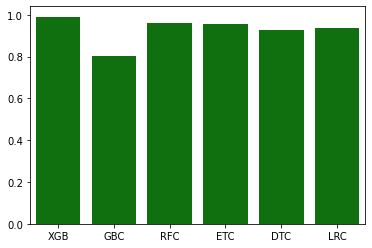

In [32]:
#visulaize the result in bar chart 
import matplotlib.pyplot as plt
import seaborn as sns
i=['XGB','GBC','RFC','ETC','DTC','LRC']
j=[x_accuracy,h_accuracy,r_accuracy,e_accuracy,d_accuracy,l_accuracy]
sns.barplot(i,j,color='green')